In [3]:
from NumpyNet import NumpyNet
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import time
from load_mnist import mini_batch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

# D. Cashon
# 2019 05 06
# implementation of single hidden layer neural net
# using numpy
# data manipulation functions are present in load_mnist

## Description
In the first section, same architecture (single hidden FC layer with n=128) is trained with batch_size = [16,64,256,1026] using batch GD

In second section, same thing except Adam is used for the optimizer

In thirs section, same thing, except tensorflow using GD and adam

NOTE: ALL PLOTS PRIOR TO TENSORFLOW, TRAINING ACCURACY IN PLOT TITLE REFERS TO TEST ACCURACY

## Load in the data

In [2]:
# get the data
mnist = input_data.read_data_sets("MNIST_data/",reshape=False,one_hot=True)
x_train, y_train           = mnist.train.images, mnist.train.labels
x_validation, y_validation = mnist.validation.images, mnist.validation.labels
x_test, y_test             = mnist.test.images, mnist.test.labels

# get batch generator on training data
# reshape and flatten
# little messy, works
x_train_reshape = np.reshape(x_train, (55000, 28, 28))
x_train_reshape2 = np.reshape(x_train, (55000, 784))
x_validation_reshape = np.reshape(x_validation, (5000, 28, 28))
x_val_reshape2 = np.reshape(x_validation_reshape, (5000, 784))
x_test_reshape = np.reshape(x_test, (10000, 28, 28, 1))
x_test_reshape2 = np.reshape(x_test_reshape, (10000, 784))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Part E: MiniBatch Size 16
Comments: should have left this training longer, but downward trend is observed. Issues with gradient stability, I modified initialization after

## Hyperparameters

In [48]:
# hyperparameters
batch_size = 16
lr = 0.0001
num_epochs = 1

In [49]:
# create the net
my_net = NumpyNet(784, 128, 10)

Training for Epoch 	0
Current Minibatch Train Loss is 	101.39284247355012
Accuracy is 	0.0625
Validation Acc 	 0.1028
Current Minibatch Train Loss is 	105.65982622602962
Accuracy is 	0.0625
Validation Acc 	 0.109
Current Minibatch Train Loss is 	72.09065356922771
Accuracy is 	0.1875
Validation Acc 	 0.1144
Current Minibatch Train Loss is 	71.25764679407382
Accuracy is 	0.0
Validation Acc 	 0.1202
Current Minibatch Train Loss is 	63.52147709288714
Accuracy is 	0.1875
Validation Acc 	 0.128
Current Minibatch Train Loss is 	69.22055932006562
Accuracy is 	0.1875
Validation Acc 	 0.1352
Current Minibatch Train Loss is 	84.25431441876147
Accuracy is 	0.125
Validation Acc 	 0.1412
Current Minibatch Train Loss is 	58.36926157659617
Accuracy is 	0.1875
Validation Acc 	 0.147
Current Minibatch Train Loss is 	52.861881607059445
Accuracy is 	0.1875
Validation Acc 	 0.1542
Current Minibatch Train Loss is 	77.84266704306161
Accuracy is 	0.0625
Validation Acc 	 0.1606
Current Minibatch Train Loss is 

Text(0.5, 0.98, 'Batch_size = 16 \nTime Elapsed [s]: 67.65699815750122\n Training Accuracy at End: 0.1886')

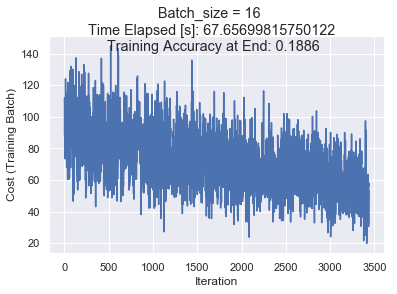

In [50]:
# create NumpyNet
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='standard')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 250 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 16 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Part E: MiniBatch size 64
Gradient issues here

Training for Epoch 	0
Current Minibatch Train Loss is 	14.35136998406564
Accuracy is 	0.109375
Validation Acc 	 0.0926
Current Minibatch Train Loss is 	12.117704120819305
Accuracy is 	0.046875
Validation Acc 	 0.0968
Current Minibatch Train Loss is 	8.846225593178051
Accuracy is 	0.09375
Validation Acc 	 0.1092
Current Minibatch Train Loss is 	8.417977415728018
Accuracy is 	0.15625
Validation Acc 	 0.1244
Current Minibatch Train Loss is 	6.477181807346112
Accuracy is 	0.1875
Validation Acc 	 0.1482
Current Minibatch Train Loss is 	5.974852641372216
Accuracy is 	0.15625
Validation Acc 	 0.166
Current Minibatch Train Loss is 	7.113647738908928
Accuracy is 	0.1875
Validation Acc 	 0.184
Current Minibatch Train Loss is 	6.056892027784563
Accuracy is 	0.1875
Validation Acc 	 0.2094
Current Minibatch Train Loss is 	4.776702137875994
Accuracy is 	0.3125
Validation Acc 	 0.2312
Current Minibatch Train Loss is 	3.8677515534797084
Accuracy is 	0.3125
Validation Acc 	 0.2546
Current Minibatch Tra

Text(0.5, 0.98, 'Batch_size = 64 \nTime Elapsed [s]: 71.80056405067444\n Training Accuracy at End: 0.3904')

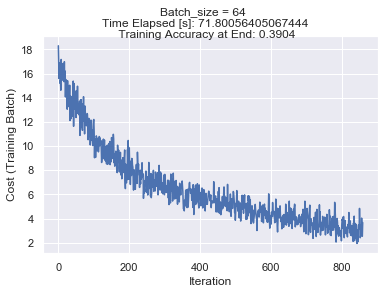

In [4]:
# hyperparameters
batch_size = 64
lr = 0.0005
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='standard')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 50 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(2)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 64 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Part E: MiniBatch size 256

Training for Epoch 	0
Current Minibatch Train Loss is 	6.271564260466572
Accuracy is 	0.14453125
Validation Acc 	 0.1206
Current Minibatch Train Loss is 	5.8424771124812995
Accuracy is 	0.13671875
Validation Acc 	 0.138
Current Minibatch Train Loss is 	4.92083602324021
Accuracy is 	0.1328125
Validation Acc 	 0.1588
Current Minibatch Train Loss is 	5.337604596064402
Accuracy is 	0.12109375
Validation Acc 	 0.1828
Current Minibatch Train Loss is 	4.312692038453395
Accuracy is 	0.19140625
Validation Acc 	 0.2088
Current Minibatch Train Loss is 	4.443284960383078
Accuracy is 	0.23046875
Validation Acc 	 0.2344
Current Minibatch Train Loss is 	4.844366730932782
Accuracy is 	0.17578125
Validation Acc 	 0.2572
Current Minibatch Train Loss is 	3.700800275605507
Accuracy is 	0.31640625
Validation Acc 	 0.2784


Text(0.5, 0.98, 'Batch_size = 256 \nTime Elapsed [s]: 71.28461003303528\n Training Accuracy at End: 0.2838')

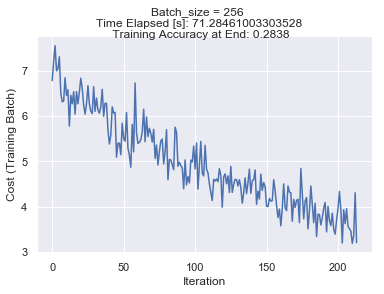

In [7]:
# hyperparameters
batch_size = 256
lr = 0.001
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='standard')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 25 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(3)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 256 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Part E MiniBatch size 1024

Training for Epoch 	0
Current Minibatch Train Loss is 	9.971188533108302
Accuracy is 	0.119140625
Validation Acc 	 0.1106
Current Minibatch Train Loss is 	9.481259720207365
Accuracy is 	0.1240234375
Validation Acc 	 0.1332
Current Minibatch Train Loss is 	8.630846186330045
Accuracy is 	0.1845703125
Validation Acc 	 0.1658
Current Minibatch Train Loss is 	8.143281570822873
Accuracy is 	0.2138671875
Validation Acc 	 0.2106
Current Minibatch Train Loss is 	7.372764927356435
Accuracy is 	0.2294921875
Validation Acc 	 0.249
Current Minibatch Train Loss is 	6.474339757527139
Accuracy is 	0.2880859375
Validation Acc 	 0.279
Current Minibatch Train Loss is 	5.442757856220008
Accuracy is 	0.326171875
Validation Acc 	 0.3092
Current Minibatch Train Loss is 	4.754168596895373
Accuracy is 	0.3486328125
Validation Acc 	 0.3432
Current Minibatch Train Loss is 	3.693905743714324
Accuracy is 	0.3935546875
Validation Acc 	 0.384
Current Minibatch Train Loss is 	2.5363566589100603
Accuracy is 	0.4697265

Text(0.5, 0.98, 'Batch_size = 256 \nTime Elapsed [s]: 70.47410202026367\n Training Accuracy at End: 0.4792')

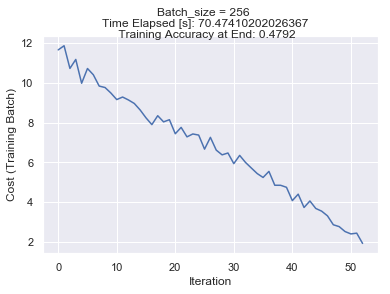

In [9]:
# hyperparameters
batch_size = 1024
lr = 0.01
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='standard')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 5 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(4)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 256 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Repeat with ADAM, BatchSize = 16

Training for Epoch 	0
Current Minibatch Train Loss is 	9.550674580163218
Accuracy is 	0.0625
Validation Acc 	 0.1366
Current Minibatch Train Loss is 	8.916105085530024
Accuracy is 	0.125
Validation Acc 	 0.1548
Current Minibatch Train Loss is 	6.033990488066863
Accuracy is 	0.25
Validation Acc 	 0.1878
Current Minibatch Train Loss is 	5.671367505687092
Accuracy is 	0.0625
Validation Acc 	 0.2178
Current Minibatch Train Loss is 	6.031828065352347
Accuracy is 	0.3125
Validation Acc 	 0.247
Current Minibatch Train Loss is 	4.209176716774664
Accuracy is 	0.3125
Validation Acc 	 0.2726
Current Minibatch Train Loss is 	5.797476698961479
Accuracy is 	0.125
Validation Acc 	 0.3008
Current Minibatch Train Loss is 	5.435590593674647
Accuracy is 	0.25
Validation Acc 	 0.3382
Current Minibatch Train Loss is 	4.8340404343793555
Accuracy is 	0.25
Validation Acc 	 0.374
Current Minibatch Train Loss is 	4.937448812113105
Accuracy is 	0.375
Validation Acc 	 0.3996
Current Minibatch Train Loss is 	3.222

Text(0.5, 0.98, 'Batch_size = 16 \nTime Elapsed [s]: 83.47968196868896\n Training Accuracy at End: 0.785')

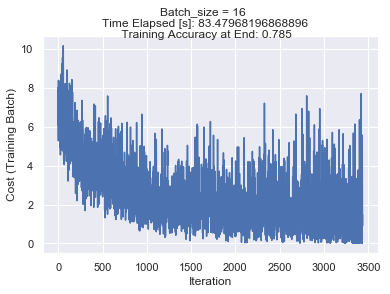

In [10]:
# create NumpyNet
batch_size = 16
lr = 0.00005
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='adam')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 50 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(5)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 16 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Adam: BatchSize 64

Training for Epoch 	0
Current Minibatch Train Loss is 	7.203873948824463
Accuracy is 	0.09375
Validation Acc 	 0.1502
Current Minibatch Train Loss is 	4.677364893536126
Accuracy is 	0.1875
Validation Acc 	 0.2082
Current Minibatch Train Loss is 	4.679247418486293
Accuracy is 	0.203125
Validation Acc 	 0.2594
Current Minibatch Train Loss is 	3.925313727470037
Accuracy is 	0.3125
Validation Acc 	 0.3192
Current Minibatch Train Loss is 	4.418689107203705
Accuracy is 	0.265625
Validation Acc 	 0.3882
Current Minibatch Train Loss is 	2.8627294932480503
Accuracy is 	0.5
Validation Acc 	 0.4334
Current Minibatch Train Loss is 	1.9761012810717205
Accuracy is 	0.578125
Validation Acc 	 0.4858
Current Minibatch Train Loss is 	1.8070034963970942
Accuracy is 	0.53125
Validation Acc 	 0.5238
Current Minibatch Train Loss is 	3.1839816501485867
Accuracy is 	0.4375
Validation Acc 	 0.5646
Current Minibatch Train Loss is 	1.0266989722931585
Accuracy is 	0.703125
Validation Acc 	 0.584
Current Minibatch

Text(0.5, 0.98, 'Batch_size = 64 \nTime Elapsed [s]: 90.00504064559937\n Training Accuracy at End: 0.6901')

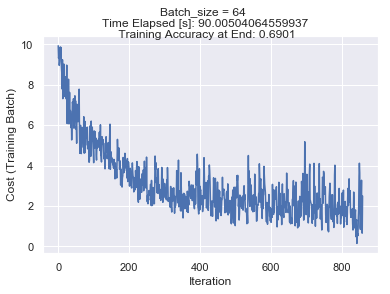

In [12]:
# create NumpyNet
batch_size = 64
lr = 0.0001
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='adam')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 50 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(6)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 64 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## ADAM: batch_size=256

Training for Epoch 	0
Current Minibatch Train Loss is 	3.3061591567608364
Accuracy is 	0.1953125
Validation Acc 	 0.1792
Current Minibatch Train Loss is 	2.8524330832513822
Accuracy is 	0.265625
Validation Acc 	 0.2626
Current Minibatch Train Loss is 	2.2863733912266033
Accuracy is 	0.40625
Validation Acc 	 0.3636
Current Minibatch Train Loss is 	1.9874838924547475
Accuracy is 	0.46484375
Validation Acc 	 0.4386


Text(0.5, 0.98, 'Batch_size = 256 \nTime Elapsed [s]: 80.37460851669312\n Training Accuracy at End: 0.4628')

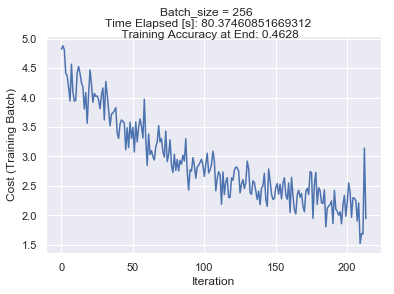

In [13]:
# create NumpyNet
batch_size = 256
lr = 0.0001
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='adam')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 50 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(7)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 256 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## ADAM: Batch_size = 1024

Training for Epoch 	0
Current Minibatch Train Loss is 	9.34450246502037
Accuracy is 	0.099609375
Validation Acc 	 0.1012
Current Minibatch Train Loss is 	9.088581512670382
Accuracy is 	0.0888671875
Validation Acc 	 0.108
Current Minibatch Train Loss is 	8.099158625745597
Accuracy is 	0.1513671875
Validation Acc 	 0.1188
Current Minibatch Train Loss is 	7.659065845058828
Accuracy is 	0.1298828125
Validation Acc 	 0.1304
Current Minibatch Train Loss is 	6.867701403765442
Accuracy is 	0.150390625
Validation Acc 	 0.1454


Text(0.5, 0.98, 'Batch_size = 1024 \nTime Elapsed [s]: 82.72998762130737\n Training Accuracy at End: 0.1478')

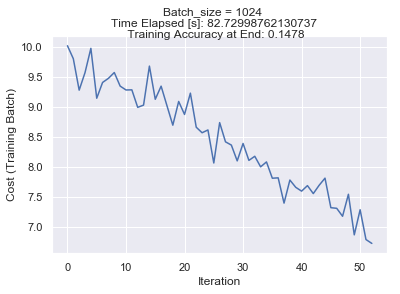

In [14]:
# create NumpyNet
batch_size = 1024
lr = 0.0001
num_epochs = 1
# create NumpyNet
my_net = NumpyNet(784, 128, 10)
losses = []
count = 0#for i in range(num_epochs):
#print('Training on Epoch: \t' + str(i))
start = time.time()
for epochs in range(num_epochs):
    print('Training for Epoch \t' + str(epochs))
    training_batches = mini_batch(x_train_reshape2, y_train, batch_size)
    for features, labels in training_batches:
        count += 1
        my_net.train(features, labels, lr=lr, method='adam')
        pred = my_net.forward_pass(features)
        loss = (1 / batch_size) * np.sum(-labels * np.log(pred))
        losses.append(loss)
        if count % 10 == 0:
            # training
            print('Current Minibatch Train Loss is \t' + str(loss))
            acc = np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(labels, axis=1))) / batch_size
            print('Accuracy is \t' + str(acc))
            # validation
            val_pred = my_net.forward_pass(x_val_reshape2)
            val_acc = np.sum(np.equal(np.argmax(val_pred, axis=1), np.argmax(y_validation, axis=1))) / 5000
            print('Validation Acc \t ' + str(val_acc))
test_pred = my_net.forward_pass(x_test_reshape2)
test_acc = np.sum(np.equal(np.argmax(test_pred, axis=1), np.argmax(y_test, axis=1))) / 10000
end = time.time()
elapsed = end - start
plt.figure(8)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost (Training Batch)')
plt.suptitle('Batch_size = 1024 \n' + 
             'Time Elapsed [s]: ' + str(elapsed) +
             '\n Training Accuracy at End: ' + str(test_acc))

## Part E: Using Tensorflow

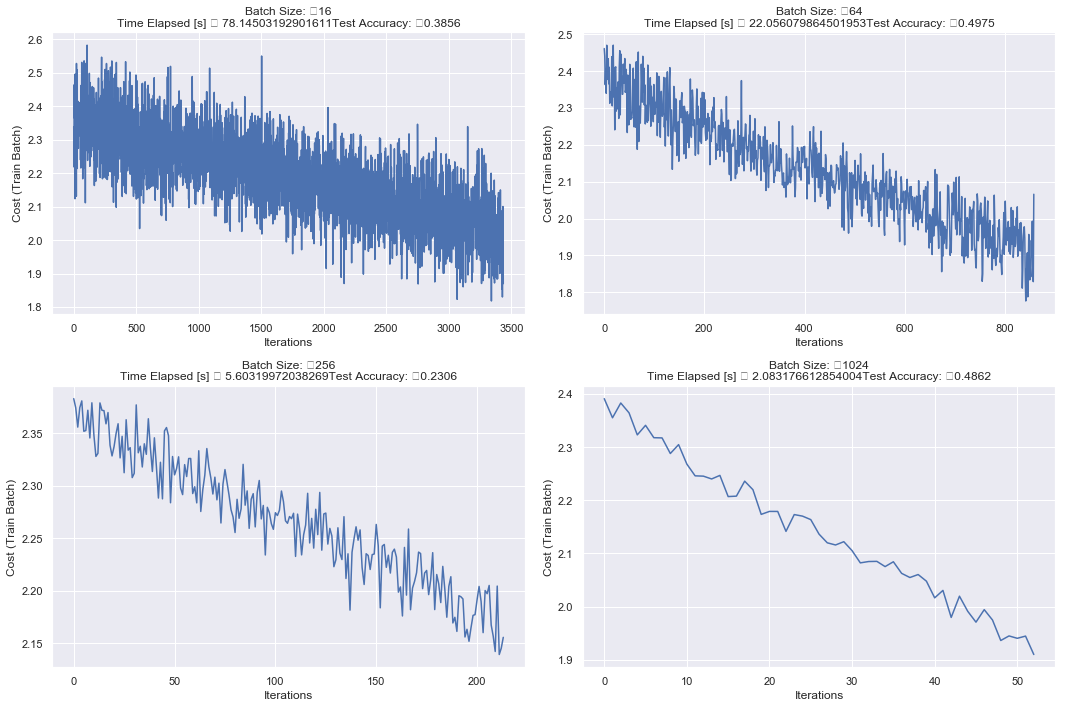

In [30]:
# D. Cashon
# this code could be better structured
# plot
plt.figure(9, figsize=(15,10))

# hyperparams
batch_sizes = [16, 64, 256, 1024]
learning_rates = [0.0001, 0.0005, 0.001, 0.01]
costs = []
plt_num = 1
for batch, lr in zip(batch_sizes, learning_rates):
    # construct the net
    # feed vars
    tf.reset_default_graph()
    features = tf.placeholder(tf.float32, shape=(None, 784))
    labels = tf.placeholder(tf.float32, shape=(None, 10))
    # the net 
    hidden = tf.layers.dense(features, units=128, activation=tf.nn.relu)
    output = tf.layers.dense(hidden, units=10)
    output_softmax = tf.nn.softmax(output)
    # losses, optimization
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))
    opt = tf.train.GradientDescentOptimizer(learning_rate=lr)
    to_minimize = opt.minimize(cost)

    # compare prediction accuracy 
    correct_pred = tf.equal(tf.argmax(tf.nn.softmax(output),1),tf.argmax(labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    init = tf.global_variables_initializer()
    count = 0
    to_plot = []
    with tf.Session() as sess:
        sess.run(init)
        start = time.time()
        for i in range(num_epochs): # 1 epoch
            training_batches = mini_batch(x_train_reshape2, y_train, batch)
            for x, y in training_batches:
                count += 1
                f_dict = {features: x, labels:y}
                sess.run(to_minimize, feed_dict=f_dict)
                c_acc = sess.run(accuracy, feed_dict=f_dict)
                c_cost = sess.run(cost, feed_dict=f_dict)
                to_plot.append(c_cost)
                #print('Accuracy is: \t \t' + str(c_acc))
                #print('Cost is : \t \t' + str(c_cost))
                val_acc = sess.run(accuracy, feed_dict={features:x_val_reshape2, labels:y_validation})
                #print('Validation Acc: \t' + str(val_acc))
        elapsed = time.time() - start
        test_acc = sess.run(accuracy, feed_dict={features: x_test_reshape2, labels: y_test})
        plt.subplot(2,2, plt_num)
        plt_num += 1
        plt.plot(to_plot)
        plt.xlabel('Iterations')
        plt.ylabel('Cost (Train Batch)')
        plt.title('Batch Size: \t' + str(batch) + '\n' +
                     'Time Elapsed [s] \t ' + str(elapsed) +
                     'Test Accuracy: \t'  + str(test_acc))
plt.tight_layout()

## Tensorflow With ADAM Optimizer

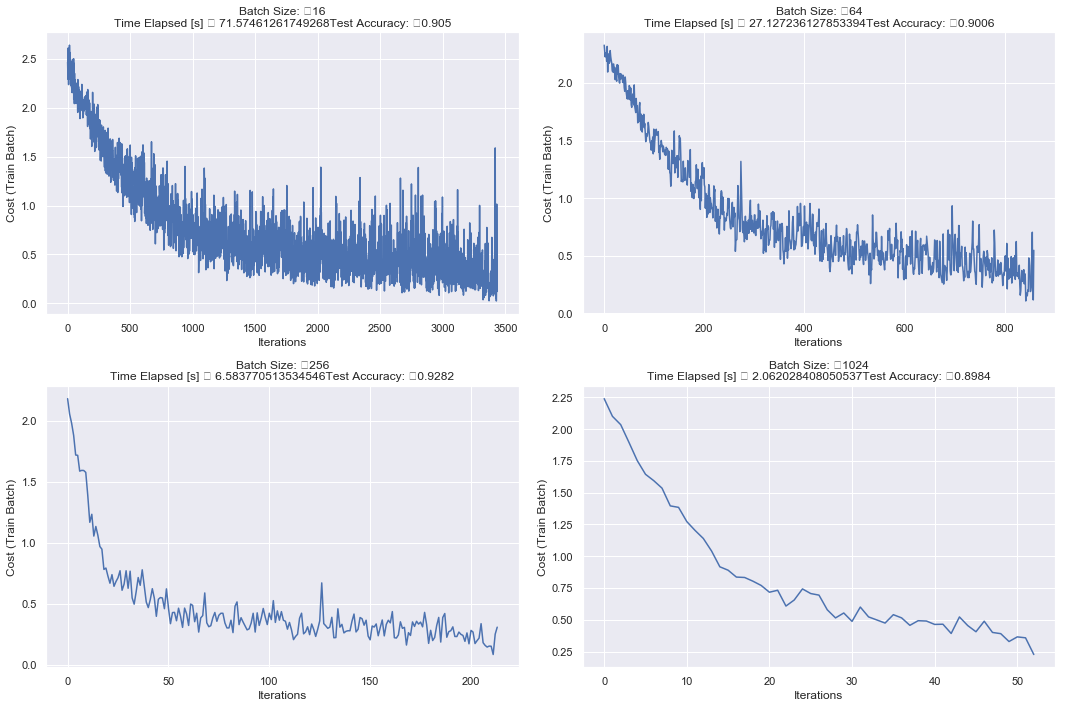

In [31]:
plt.figure(10, figsize=(15,10))

# hyperparams, same as used for numpynet
batch_sizes = [16, 64, 256, 1024]
learning_rates = [0.00005, 0.0001, 0.001, 0.001]
costs = []
plt_num = 1
for batch, lr in zip(batch_sizes, learning_rates):
    # construct the net
    # feed vars
    tf.reset_default_graph()
    features = tf.placeholder(tf.float32, shape=(None, 784))
    labels = tf.placeholder(tf.float32, shape=(None, 10))
    # the net 
    hidden = tf.layers.dense(features, units=128, activation=tf.nn.relu)
    output = tf.layers.dense(hidden, units=10)
    output_softmax = tf.nn.softmax(output)
    # losses, optimization
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))
    opt = tf.train.AdamOptimizer(learning_rate=lr) #already uses the default betas and epsilon needed
    to_minimize = opt.minimize(cost)

    # compare prediction accuracy 
    correct_pred = tf.equal(tf.argmax(tf.nn.softmax(output),1),tf.argmax(labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    init = tf.global_variables_initializer()
    count = 0
    to_plot = []
    with tf.Session() as sess:
        sess.run(init)
        start = time.time()
        for i in range(num_epochs): # 1 epoch
            training_batches = mini_batch(x_train_reshape2, y_train, batch)
            for x, y in training_batches:
                count += 1
                f_dict = {features: x, labels:y}
                sess.run(to_minimize, feed_dict=f_dict)
                c_acc = sess.run(accuracy, feed_dict=f_dict)
                c_cost = sess.run(cost, feed_dict=f_dict)
                to_plot.append(c_cost)
                #print('Accuracy is: \t \t' + str(c_acc))
                #print('Cost is : \t \t' + str(c_cost))
                val_acc = sess.run(accuracy, feed_dict={features:x_val_reshape2, labels:y_validation})
                #print('Validation Acc: \t' + str(val_acc))
        elapsed = time.time() - start
        test_acc = sess.run(accuracy, feed_dict={features: x_test_reshape2, labels: y_test})
        plt.subplot(2,2, plt_num)
        plt_num += 1
        plt.plot(to_plot)
        plt.xlabel('Iterations')
        plt.ylabel('Cost (Train Batch)')
        plt.title('Batch Size: \t' + str(batch) + '\n' +
                     'Time Elapsed [s] \t ' + str(elapsed) +
                     'Test Accuracy: \t'  + str(test_acc))
plt.tight_layout()